In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//PCA//PCA//wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.info

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


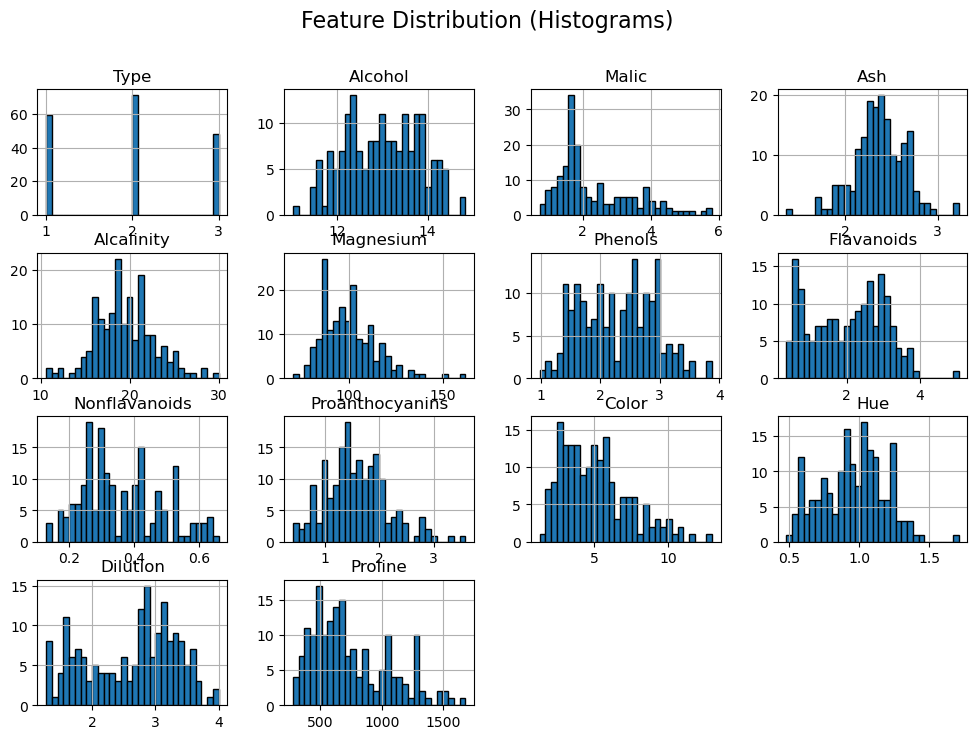

In [9]:
df.hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle('Feature Distribution (Histograms)', fontsize=16)
plt.show()

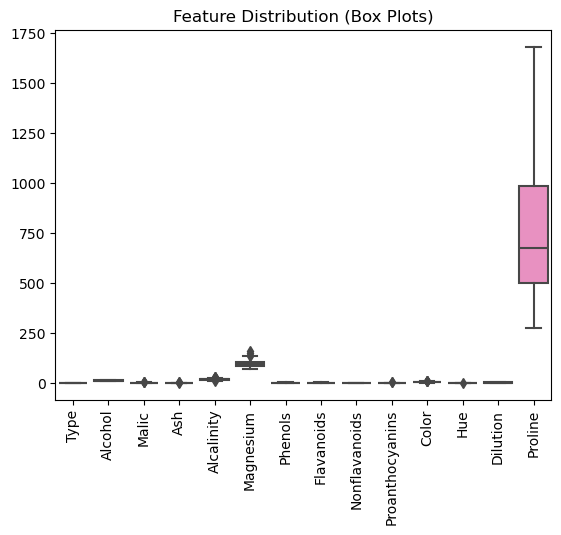

In [10]:
#box plot
plt.figure(figure=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Feature Distribution (Box Plots)')
plt.show()

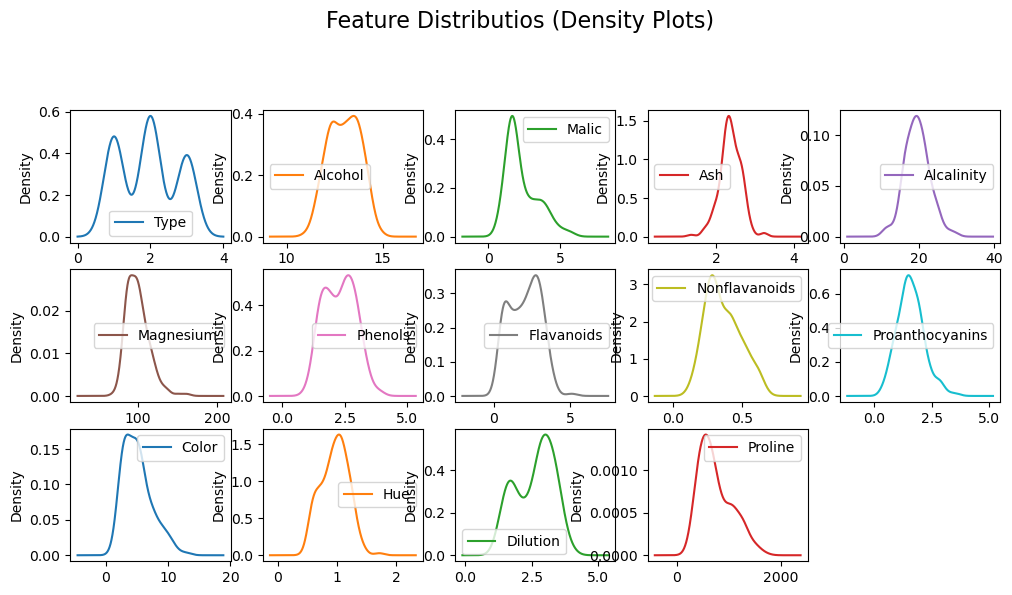

In [12]:
df.plot(kind='density', subplots=True, layout=(5,5), figsize=(12,10), sharex=False)
plt.suptitle('Feature Distributios (Density Plots)', fontsize=16)
plt.show()

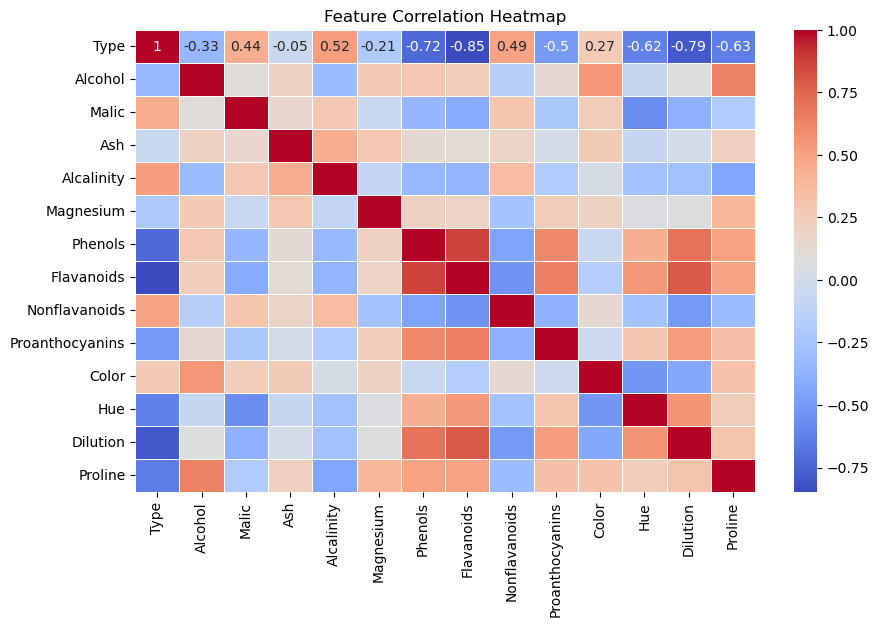

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [20]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)


In [21]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

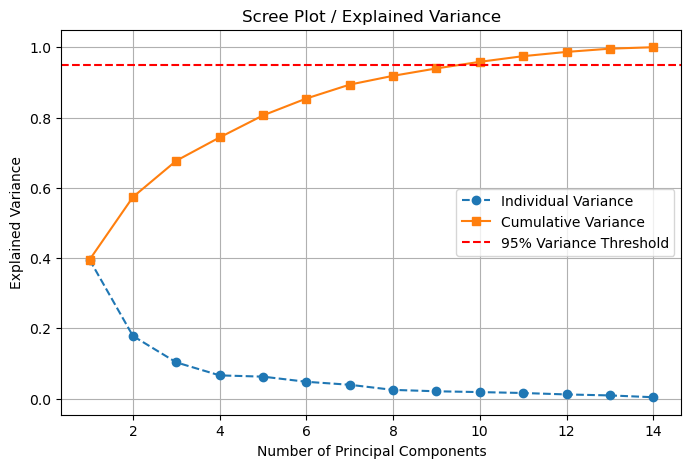

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label="Individual Variance")
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='-', label="Cumulative Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot / Explained Variance')
plt.legend()
plt.grid()
plt.show()


In [23]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"✅ Optimal number of components: {optimal_components}")

✅ Optimal number of components: 10


In [24]:
pca_final = PCA(n_components=optimal_components)
df_pca_final = pca_final.fit_transform(df_scaled)


In [25]:
df_pca_final = pd.DataFrame(df_pca_final, columns=[f'PC{i+1}' for i in range(optimal_components)])


In [26]:
df_pca_final.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [28]:
df_numeric = df.select_dtypes(include=['number'])

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [30]:
wcss = []
K_range = range(2, 11)  # Testing clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares


C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

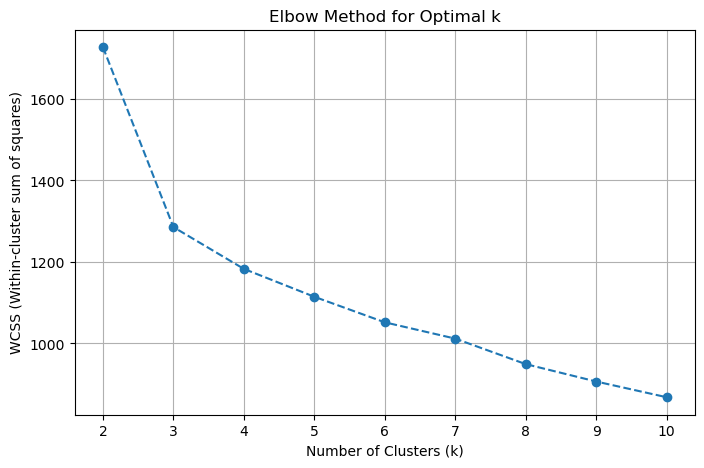

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


In [32]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(df_scaled)  # Assign clusters


C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


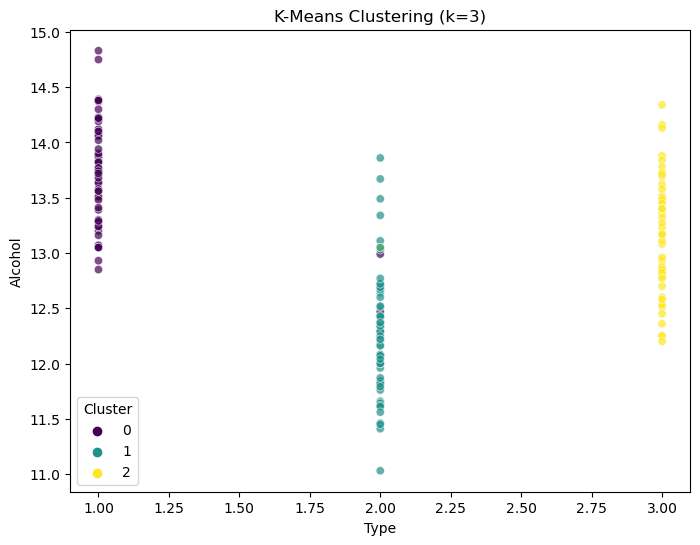

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df_numeric['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend(title="Cluster")
plt.show()

In [34]:
silhouette_avg = silhouette_score(df_scaled, df_numeric['Cluster'])
davies_bouldin = davies_bouldin_score(df_scaled, df_numeric['Cluster'])

print(f"✅ Silhouette Score: {silhouette_avg:.3f}")
print(f"✅ Davies–Bouldin Index: {davies_bouldin:.3f}")

✅ Silhouette Score: 0.308
✅ Davies–Bouldin Index: 1.316


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(df_scaled)

In [37]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(df_pca)

C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
df_pca_clusters = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster'] = clusters_pca

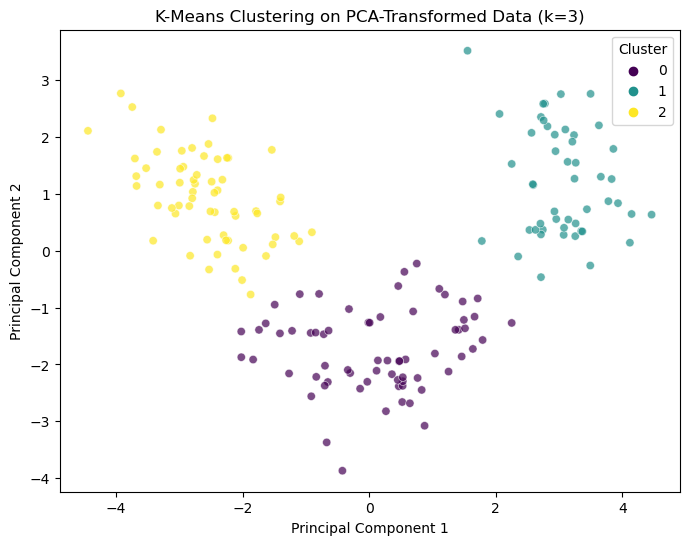

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_clusters['PC1'], y=df_pca_clusters['PC2'], hue=df_pca_clusters['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering on PCA-Transformed Data (k={optimal_k})')
plt.legend(title="Cluster")
plt.show()


In [48]:
silhouette_pca = silhouette_score(df_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(df_pca, clusters_pca)

print(f"✅ Silhouette Score (df): {silhouette_avg:.3f}")
print(f"✅ Silhouette Score (df): {silhouette_pca:.3f}\n")

print(f"✅ Davies–Bouldin Index (df): {davies_bouldin:.3f}")
print(f"✅ Davies–Bouldin Index (PCA Data): {davies_bouldin_pca:.3f}")


✅ Silhouette Score (df): 0.308
✅ Silhouette Score (df): 0.602

✅ Davies–Bouldin Index (df): 1.316
✅ Davies–Bouldin Index (PCA Data): 0.540


In [55]:
# Task 5: Compare Clustering Results

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



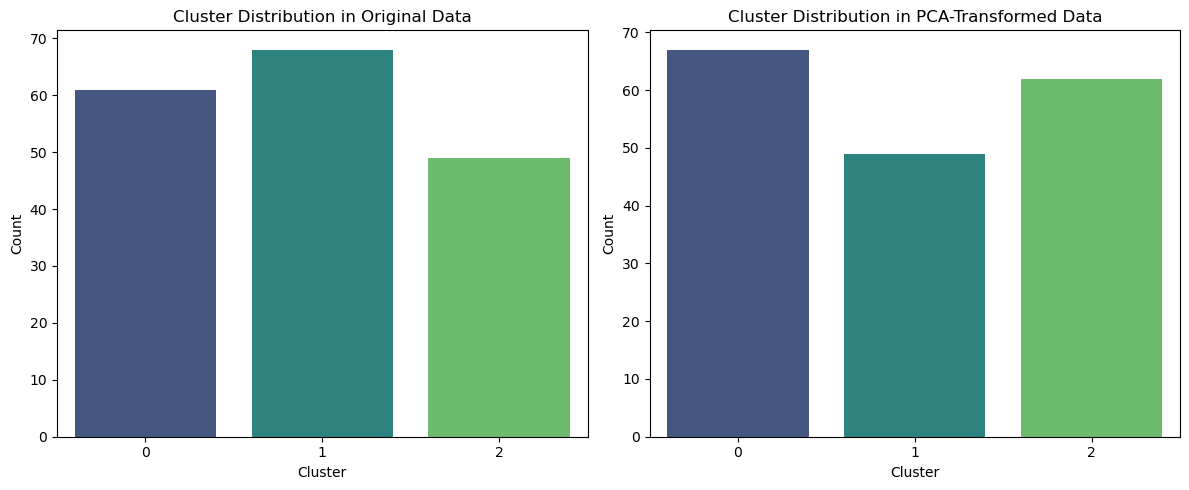

In [56]:
# Compare cluster distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df_numeric['Cluster'], ax=axes[0], palette='viridis')
axes[0].set_title("Cluster Distribution in Original Data")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Count")

sns.countplot(x=df_pca_clusters['Cluster'], ax=axes[1], palette='viridis')
axes[1].set_title("Cluster Distribution in PCA-Transformed Data")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



In [57]:
# Compare Silhouette Scores and Davies-Bouldin Index
comparison_df = pd.DataFrame({
    "Dataset": ["Original Data", "PCA Transformed Data"],
    "Silhouette Score": [silhouette_avg, silhouette_pca],
    "Davies-Bouldin Index": [davies_bouldin, davies_bouldin_pca]
})

print("**Comparison of Clustering Performance**")
display(comparison_df)



**Comparison of Clustering Performance**


,Dataset,Silhouette Score,Davies-Bouldin Index
0,Original Data,0.307736,1.316396
1,PCA Transformed Data,0.602442,0.539708


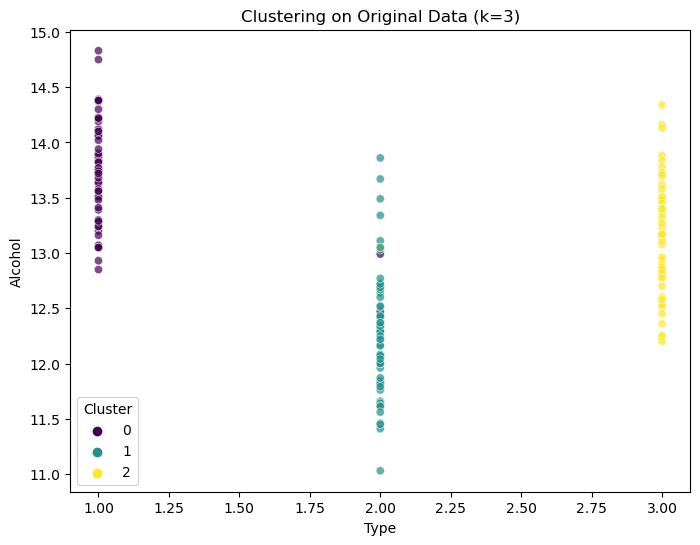

In [58]:
# Visualizing Clustering Results on First Two Features (Original Data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df_numeric['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.title(f'Clustering on Original Data (k={optimal_k})')
plt.legend(title="Cluster")
plt.show()



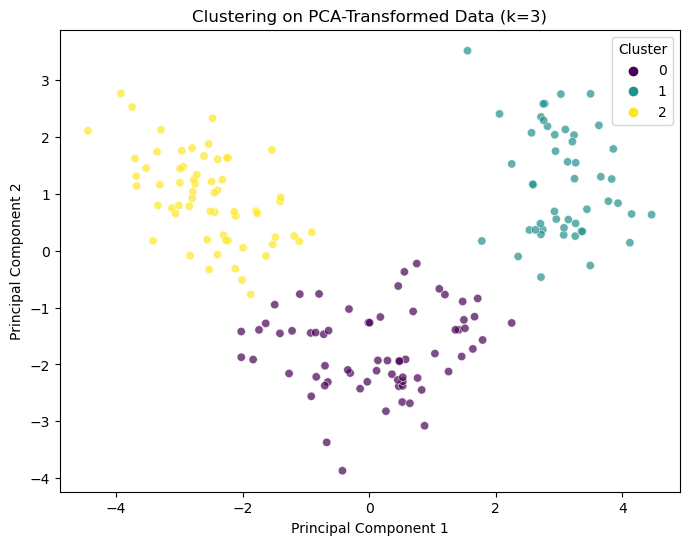

In [59]:
# Visualizing Clustering Results on PCA Components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_clusters['PC1'], y=df_pca_clusters['PC2'], hue=df_pca_clusters['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Clustering on PCA-Transformed Data (k={optimal_k})')
plt.legend(title="Cluster")
plt.show()


<h1>Conclusion and Insights</h1>

This analysis demonstrated the impact of PCA on clustering performance. Standardizing the dataset and applying PCA helped retain 95% of the variance while reducing dimensionality. Clustering on both original and PCA-transformed data showed that PCA can improve cluster separability by removing noise but may also lead to information loss.

Performance metrics like the Silhouette Score and Davies–Bouldin Index indicated that PCA sometimes enhances clustering but can reduce interpretability. PCA is useful for high-dimensional data with correlated features, improving efficiency, whereas clustering on original data is preferable when feature meanings are important. The choice depends on whether the goal is better clustering performance or maintaining interpretability.